In [1]:
import pandas as pd
from IPython.display import display, HTML
import numpy as np
import pandas as pd
from itertools import product
from PIL import Image
import os


In [4]:
TFM_PATH = '/home/amachuca/PycharmProjects/TFM_SAI/'


In [10]:
data = {'col1': [1,2], 'col2': [3,4]}
df = pd.DataFrame(data)
# display(HTML(df.to_html()))
print(df)



   col1  col2
0     1     3
1     2     4


In [15]:
def load_image_casia_multi_spectral_palmprintV1(row):
    ruta_imagen = (
        TFM_PATH
        + f"datasets/CASIA-Multi-Spectral-PalmprintV1/{row['Usuario']}_{row['Mano']}_{row['Bandas']}_{row['Fotos']}.jpg"
    )
    imagen = Image.open(ruta_imagen)
    imagen_array = np.array(imagen)
    return imagen_array


def load_casia_multi_spectral_palmprintV1():
    usuarios = [f"{i:03}" for i in range(1, 101)]
    manos = ["l", "r"]
    bandas = [460, 630, 700, 850, 940, "WHT"]
    fotos = [f"{i:02}" for i in range(1, 7)]
    df = pd.DataFrame(
        product(usuarios, manos, bandas, fotos),
        columns=["Usuario", "Mano", "Bandas", "Fotos"],
    )

    df["Imagen"] = df.apply(lambda row: load_image_casia_multi_spectral_palmprintV1(row), axis=1)
    display(df.head())


load_casia_multi_spectral_palmprintV1()

,Usuario,Mano,Bandas,Fotos,Imagen
0,001,l,460,01,"[[11, 11, 10, 10, 10, 9, 9, 9, 10, 10, 10, 10,..."
1,001,l,460,02,"[[11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, ..."
2,001,l,460,03,"[[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, ..."
3,001,l,460,04,"[[18, 17, 17, 15, 14, 13, 12, 12, 9, 10, 11, 1..."
4,001,l,460,05,"[[14, 14, 14, 14, 14, 14, 14, 14, 8, 9, 11, 13..."


In [14]:

def check_file_casia_palmprintV1(row):
    return os.path.exists(TFM_PATH + f"datasets/CASIA-PalmprintV1/{row['Usuario']}/{row['Usuario']}_{row['Mano']}_{row['Genero']}_{row['Foto']}.jpg"
    )
    

def load_image_casia_palmprintV1(row):
    ruta_imagen = TFM_PATH + f"datasets/CASIA-PalmprintV1/{row['Usuario']}/{row['Usuario']}_{row['Mano']}_{row['Genero']}_{row['Foto']}.jpg"
    imagen = Image.open(ruta_imagen)
    imagen_array = np.array(imagen)
    return imagen_array


def load_casia_palmprintV1():
    usuarios = [f"{i:04}" for i in range(1, 313)]
    genero = ["m", "f"]
    manos = ["l", "r"]
    fotos = [f"{i:02}" for i in range(1, 16)]
    # Crear el dataframe
    df = pd.DataFrame(
        product(usuarios, genero, manos, fotos),
        columns=["Usuario", "Mano", "Genero", "Foto"],
    )
    condition = df.apply(lambda row: check_file_casia_palmprintV1(row), axis=1)
    df_filtrado = df[condition]
    
    df["Imagen"] = df.apply(lambda row: load_image_casia_palmprintV1(row), axis=1)
    display(df_filtrado)

load_casia_palmprintV1()


FileNotFoundError: [Errno 2] No such file or directory: '/home/amachuca/PycharmProjects/TFM_SAI/datasets/CASIA-PalmprintV1/0001/0001_m_l_09.jpg'

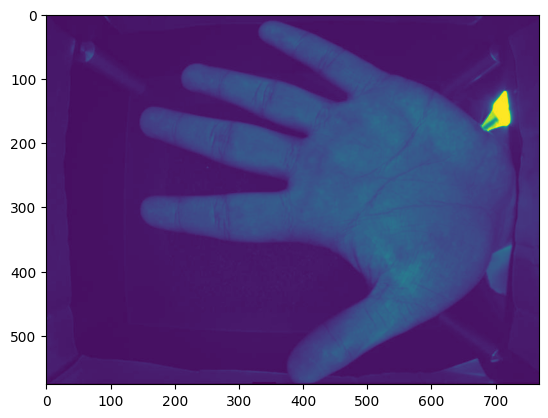

In [16]:
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

img = Image.open(TFM_PATH + "datasets/CASIA-Multi-Spectral-PalmprintV1/001_l_460_01.jpg")
plt.imshow(img,cmap='jet')